In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
titanic= sns.load_dataset('titanic')
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Write the data types of the variables**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


**Examine the quantitative data with the describe method and comment on whether there is any discrepancy and normal distribution by looking at the mean, standard deviation and quartiles of the data.**

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


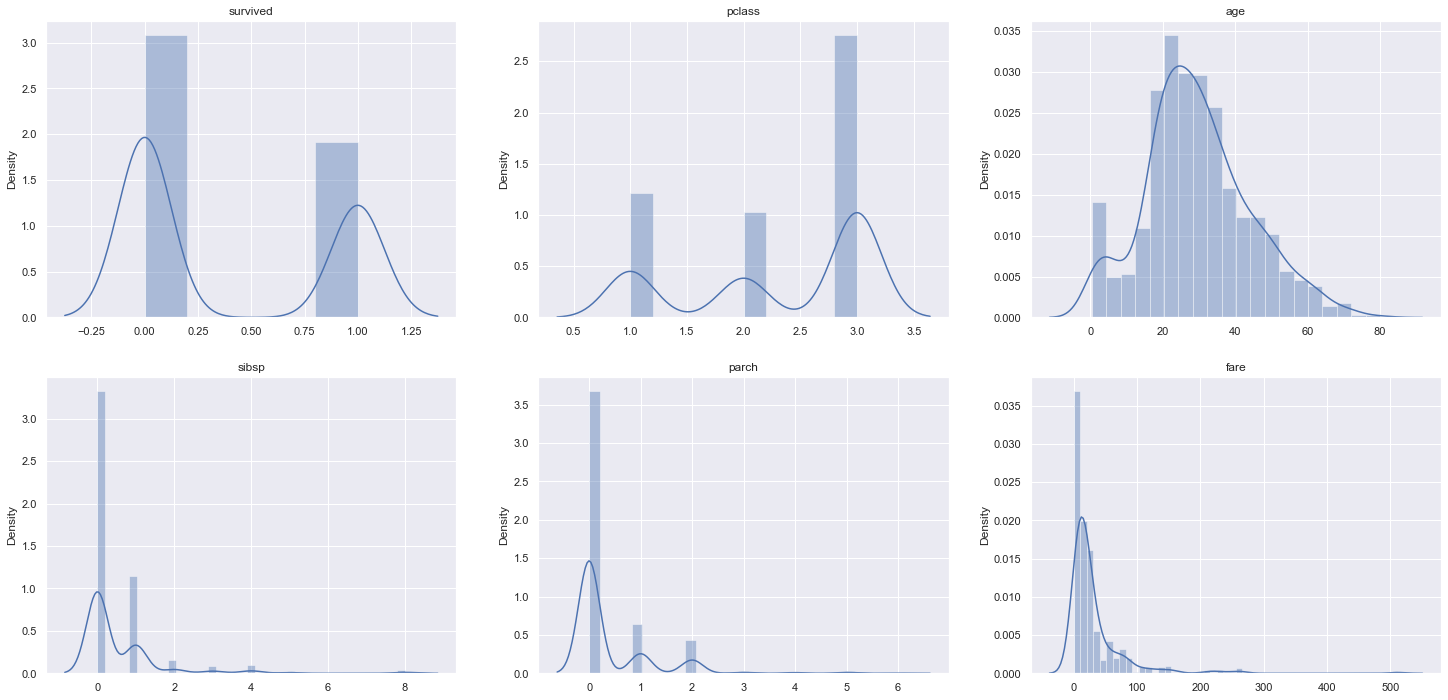

In [5]:
numeric_cols = df.describe().columns

plt.figure(figsize=(25, 12))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,3,i+1)
    sns.distplot(x=df[col])
    plt.title(col)

In [6]:
df.age.value_counts(dropna=False).sort_index()

0.42       1
0.67       1
0.75       2
0.83       2
0.92       1
        ... 
70.50      1
71.00      2
74.00      1
80.00      1
NaN      177
Name: age, Length: 89, dtype: int64

> `age` shows a distribution tends to the normal distribution.

> `fare` shows a right skewed distribution.

**Make the types of qualitative data categorical. Determine sequentially the categorical variables that can be listed. If the ordering of the sorted categorical data is not correct, make the ordering appropriate.**

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
from pandas.api.types import CategoricalDtype

cat_cols_order = ['pclass',  'class'] # Although pclass is numerical, it is actually an ordinal variable.
cat_cols_no_order = ['sex','embarked', 'who', 'adult_male', 'deck', 'embark_town','alive', 'alone']

for col in cat_cols_order:
    df[col]= df[col].astype(CategoricalDtype(ordered = True))
    
for col in cat_cols_no_order:
    df[col]= df[col].astype(CategoricalDtype(ordered = False))    

In [9]:
df['class'].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): [First < Second < Third]

In [10]:
df['pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: category
Categories (3, int64): [1 < 2 < 3]

> Hierarchical sorting of df['class'] and df['pclass'] is wrong, let's correct this.

In [11]:
for col in cat_cols_order:
    order = df[col].cat.categories[::-1]
    df[col].cat.set_categories(new_categories=order, ordered=True, inplace=True)

**Transform sex and class variables with numeric data using Label Encoder or Dummies method.**

**Label Encoder**

In [12]:
df[['sex','class']].head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex_encoded'] = labelencoder.fit_transform(df['sex'])
df['class_encoded'] = labelencoder.fit_transform(df['class'])

In [14]:
df[['sex_encoded','class_encoded']].head()

,sex_encoded,class_encoded
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2


**One Hot Encoder**

In [15]:
pd.get_dummies(df[['sex','class']])

,sex_female,sex_male,class_Third,class_Second,class_First
0,0,1,1,0,0
1,1,0,0,0,1
2,1,0,1,0,0
3,1,0,0,0,1
4,0,1,1,0,0
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,0,0,1
888,1,0,1,0,0
889,0,1,0,0,1


**Examine the normality of age and fare variables**

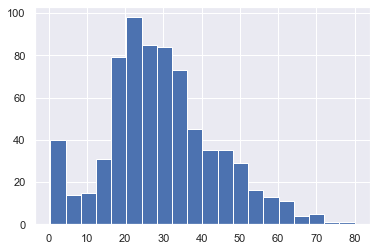

In [16]:
df.age.hist(bins=20);

In [17]:
import scipy.stats as stats
statistic, pvalue = stats.normaltest(df.age.dropna())
if pvalue < 0.05:
    print (f"pvalue is {round(pvalue,5)}, Not normal distribution")
else:
    print (f"pvalue is {round(pvalue,5)}, Normal distribution")

pvalue is 0.00012, Not normal distribution


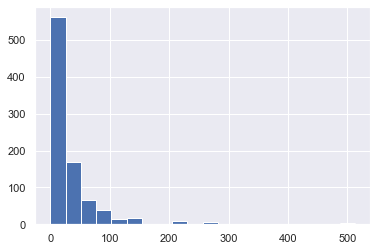

In [18]:
df.fare.hist(bins=20);

In [19]:
statistic, pvalue = stats.normaltest(df.fare.dropna())
if pvalue < 0.05:
    print (f"pvalue is {pvalue}, Not Normal distribution")
else:
    print (f"pvalue is {pvalue}, Normal distribution")

pvalue is 3.727091062842147e-197, Not Normal distribution


**Hypothesis Tests:** 

`H0 hypothesis has no effect on socio-economic class survival rates of people in Titanic crash` 

`H1 hypothesis has no effect on survival rates of socio-economic classes of people in Titanic crash.` 

Apply all the hypothesis testing steps for the hypothesis suggested above and interpret the result.

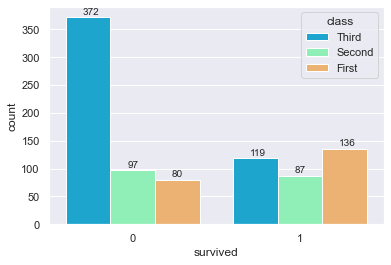

In [20]:
ax = sns.countplot(x='survived',hue='class',data=df,palette='rainbow')
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5));

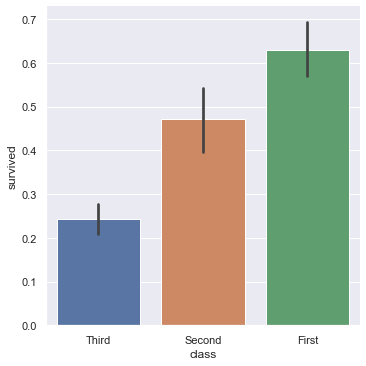

In [21]:
sns.factorplot(x="class", y ="survived", data=df, kind="bar", size=5);

> First Class passengers seem to have a higher survival rate, and third class passengers less.

> Now let's prove this with a statistical test.

* Null Hypothesis: There is a no difference in class distribution between those who survived and those who did not. 
    
    `H0: μ1 = μ2`

* Alternate Hypothesis: There is a difference in class Distribution between those who survived and those who did not
    
    `Ha: μ1 ≠ μ2`

In [22]:
# Let's get 100 samples from our population randomly, each of which is the average of 20 observations for each class.

np.random.seed(41)
sample_1st = pd.Series([np.mean(df[df["class"]=='First'].sample(20)["survived"].values) for _ in range(100)])
sample_2nd = pd.Series([np.mean(df[df["class"]=='Second'].sample(20)["survived"].values) for _ in range(100)])
sample_3rd = pd.Series([np.mean(df[df["class"]=='Third'].sample(20)["survived"].values) for _ in range(100)])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

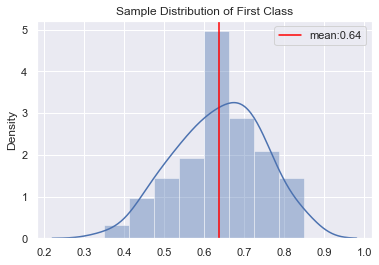

In [23]:
sns.distplot(sample_1st)
mean = np.mean(sample_1st)
plt.axvline(mean, color='red', label=f'mean:{round(mean,2)}')
plt.title('Sample Distribution of First Class')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

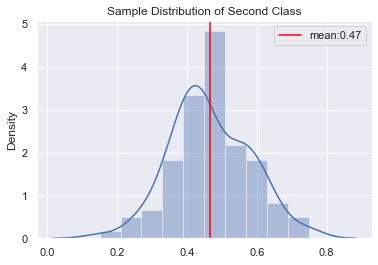

In [24]:
sns.distplot(sample_2nd)
mean = np.mean(sample_2nd)
plt.axvline(mean, color='red', label=f'mean:{round(mean,2)}')
plt.title('Sample Distribution of Second Class')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

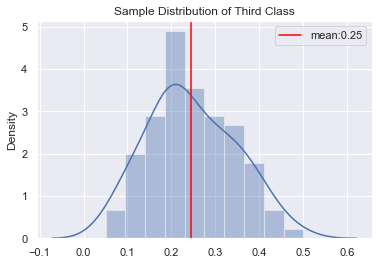

In [25]:
sns.distplot(sample_3rd)
mean = np.mean(sample_3rd)
plt.axvline(mean, color='red', label=f'mean:{round(mean,2)}')
plt.title('Sample Distribution of Third Class')
plt.legend()
plt.show()

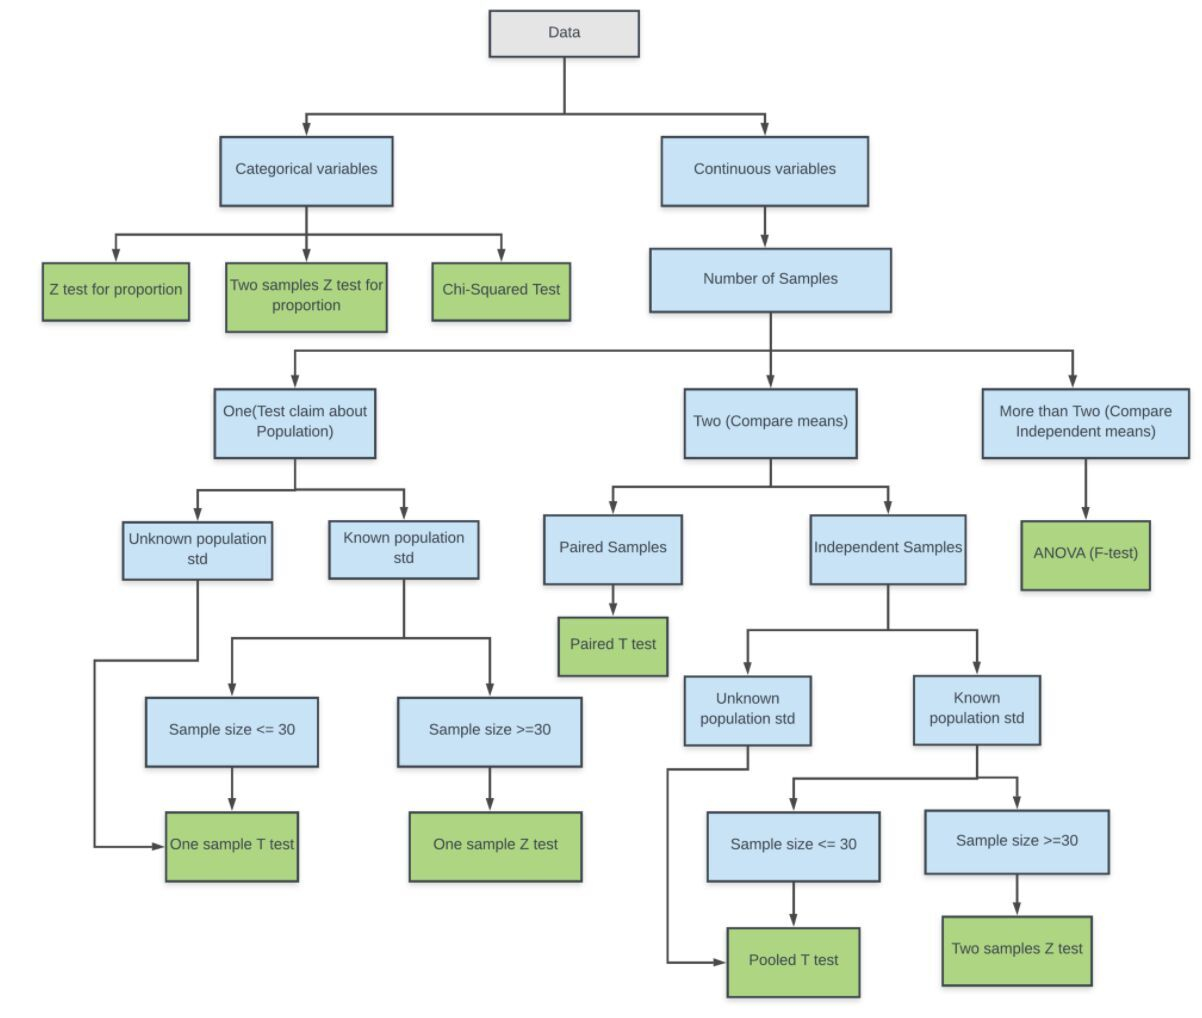

* It is enough to compare any 2 classes, we will test for First class and third class. 
* According to the table above, "Two samples z test" is applied. Two normally distributed but independent populations, σ is known.
* where equation and equation are the means of the two samples, Δ is the hypothesized difference between the population means (0 if testing for equal means), σ 1 and σ 2 are the standard deviations of the two populations, and n 1and n 2are the sizes of the two samples.
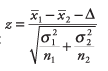

In [26]:
effect = np.mean(sample_1st) - np.mean(sample_3rd)
sigma_first = np.std(sample_1st)
sigma_third = np.std(sample_3rd)
sigma_difference = np.sqrt((sigma_first**2)/len(sample_1st)  +  (sigma_third**2)/len(sample_3rd))
z_score = effect / sigma_difference
z_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

26.37350484100375

In [27]:
p_value = stats.norm.sf(abs(z_score))*2

alpha = 0.05

if p_value<alpha:
    print(f'''At {alpha} level of significance, we can reject the null hypothesis in favor of Ha.
    
There is a difference in class Distribution.

So We can say that the socio-economic class of the people affected their survival rate.''')
else:
    print(f'At {alpha} level of significance, we fail to reject the null hypothesis.')

At 0.05 level of significance, we can reject the null hypothesis in favor of Ha.
    
There is a difference in class Distribution.

So We can say that the socio-economic class of the people affected their survival rate.
